In [176]:
#import libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [218]:
#show image array by cv 
img = plt.imread('/content/01144.jpg')
img

array([[[143, 159,  97],
        [139, 155,  93],
        [136, 152,  90],
        ...,
        [ 40,  52,  30],
        [ 39,  51,  29],
        [ 38,  50,  28]],

       [[144, 160,  98],
        [140, 156,  94],
        [137, 153,  91],
        ...,
        [ 40,  52,  30],
        [ 39,  51,  29],
        [ 38,  50,  28]],

       [[146, 162, 100],
        [141, 157,  95],
        [137, 153,  91],
        ...,
        [ 39,  51,  29],
        [ 39,  51,  29],
        [ 38,  50,  28]],

       ...,

       [[233, 193, 191],
        [234, 195, 190],
        [234, 197, 191],
        ...,
        [199, 200, 230],
        [199, 200, 230],
        [199, 200, 230]],

       [[235, 195, 193],
        [236, 197, 192],
        [236, 197, 192],
        ...,
        [199, 200, 230],
        [199, 200, 230],
        [199, 200, 230]],

       [[236, 197, 192],
        [237, 198, 193],
        [238, 199, 194],
        ...,
        [199, 200, 230],
        [199, 200, 230],
        [199, 200, 230]]

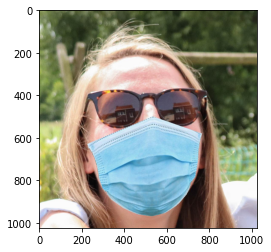

In [219]:
#show the image by matblotlib
plt.imshow(img)

In [220]:
#loading FP16 model for detection face
face_detection_model = cv2.dnn.readNetFromCaffe('/content/deploy.prototxt.txt',
                                                '/content/res10_300x300_ssd_iter_140000_fp16.caffemodel')
face_detection_model

<dnn_Net 0x7fcca1dbe7b0>

In [239]:
#write a function to show the image with detection face by the model
def face_detection(img):
    image = img.copy()
    h,w = image.shape[:2]
    blob = cv2.dnn.blobFromImage(image,1,(300,300),(104,117,123),swapRB=True)
    face_detection_model.setInput(blob)
    detections = face_detection_model.forward()
    for i in range(0,detections.shape[2]):
        confidence = detections[0,0,i,2]
        if confidence > 0.5:
            box = detections[0,0,i,3:7]*np.array([w,h,w,h])
            box = box.astype(int)
            # print(box)
            pt1 = (box[0],box[1])
            pt2 = (box[2],box[3])
            cv2.rectangle(image,pt1,pt2,(0,255,0),2)
            roi = image[box[1]:box[3],box[0]:box[2]]

            return roi
    return None         

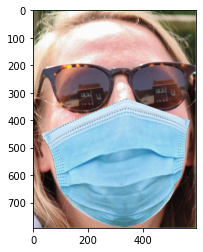

In [240]:
#show the cropping image (only the face)
face = face_detection(img)
plt.imshow(face)

In [243]:
def blob_image():
  #blob the image (RGB subtraction)
  if face is not None:
      blob = cv2.dnn.blobFromImage(face,1,(100,100),(104,117,123),swapRB=True)
      print(blob.shape)
      blob_squeeze = np.squeeze(blob).T
      print(blob_squeeze.shape)
     #rotate the image
      blob_rotate = cv2.rotate(blob_squeeze,cv2.ROTATE_90_CLOCKWISE)
     #flip the image 
      blob_flip = cv2.flip(blob_rotate,1)
      print(blob_flip.max(),blob_flip.min())
     #remove all negative values and normlizing image data 
      image_norm = np.maximum(blob_flip,0)/blob_flip.max()

      return image_norm

  else:
    return None

(1, 3, 100, 100)
(100, 100, 3)
151.0 -115.0


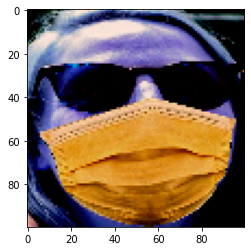

In [244]:
blob_result = blob_image()
plt.imshow(blob_result)